In [2]:
# Final plotting script for OneLL GECCO submission

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib
import scipy
import sys
import json
sns.set_context("paper", font_scale=1.25)
sns.set_style("ticks", {'axes.grid' : True, 'patch.linewidth': 0.8})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'serif'
#matplotlib.rcParams['xtick.labelsize'] = 'x-small'
#matplotlib.rcParams['ytick.labelsize'] = 'x-small'
matplotlib.rcParams.update({'font.size': 30})

plotFormat = "pdf"

In [2]:
# load data into a table
with open("main_data.json","r") as f:
    rs = json.load(f)
t = pd.DataFrame(rs) 
#print(t.experiment.unique())
#json.dump(json.loads(t.to_json()), file=open("results-new.json","wt"))
t = t[~t.experiment.str.contains("dyn__with_static")]
t = t[~t.experiment.str.contains("binning_comparison")]
t.loc[:,"experiment"] = [s.replace("dynamic","dyn") for s in t.experiment]
t = t[~t.experiment.str.contains("dyn__with_static")]
t = t[t.n < 5000]
print(t.experiment.unique())

['theory_dyn' 'tuned_dyn' 'tuned_static' 'dyn_with_static'
 'tuned_dyn_cas_bin0' 'tuned_dyn_cas_bin1' 'tuned_dyn_cas_bin2'
 'tuned_dyn_cas_bin3' 'tuned_dyn_cas_bin4' 'tuned_dyn_cas_bin5'
 'tuned_dyn_cas_bin6' 'tuned_dyn_cas_bin7' 'tuned_dyn_cas_bin8'
 'tuned_dyn_cas_bin9' 'tuned_dyn_cas_bin10' 'tuned_dyn_cas_bin11'
 'binned_theory_dyn_start' 'binned_theory_dyn_end'
 'binned_theory_dyn_middle' 'tuned_dyn_bin0' 'tuned_dyn_bin1'
 'tuned_dyn_bin2' 'tuned_dyn_bin3' 'tuned_dyn_bin4' 'tuned_dyn_bin5'
 'tuned_dyn_bin6' 'tuned_dyn_bin7' 'tuned_dyn_bin8' 'tuned_dyn_bin9'
 'tuned_dyn_bin10' 'tuned_dyn_bin11' 'binned_optimal_dyn_start'
 'binned_optimal_dyn_end' 'binned_optimal_dyn_middle' 'tuned_dyn_bin_sc5'
 'tuned_dyn_bin_sc6' 'tuned_dyn_bin_sc8' 'tuned_dyn_bin_sc9'
 'tuned_dyn_cas_bin_sc5' 'tuned_dyn_cas_bin_sc6' 'optimal_dyn'
 'optimal_dyn_bin']


In [3]:
# add one to the number of bins
for exp in ["tuned_dyn_bin", "tuned_dyn_cas_bin"]:
    t.loc[t.experiment.str.contains(exp), "experiment"] = [f"{exp}{int(s.replace(exp,''))+1}" if "sc" not in s else f"{exp}_sc{int(s.replace(exp+'_sc',''))+1}" for s in t[t.experiment.str.contains(exp)].experiment.values]
t_all = t.explode("evaluation_results")

/Users/nttd/miniconda3/lib/python3.9/site-packages/seaborn/categorical.py:3197: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


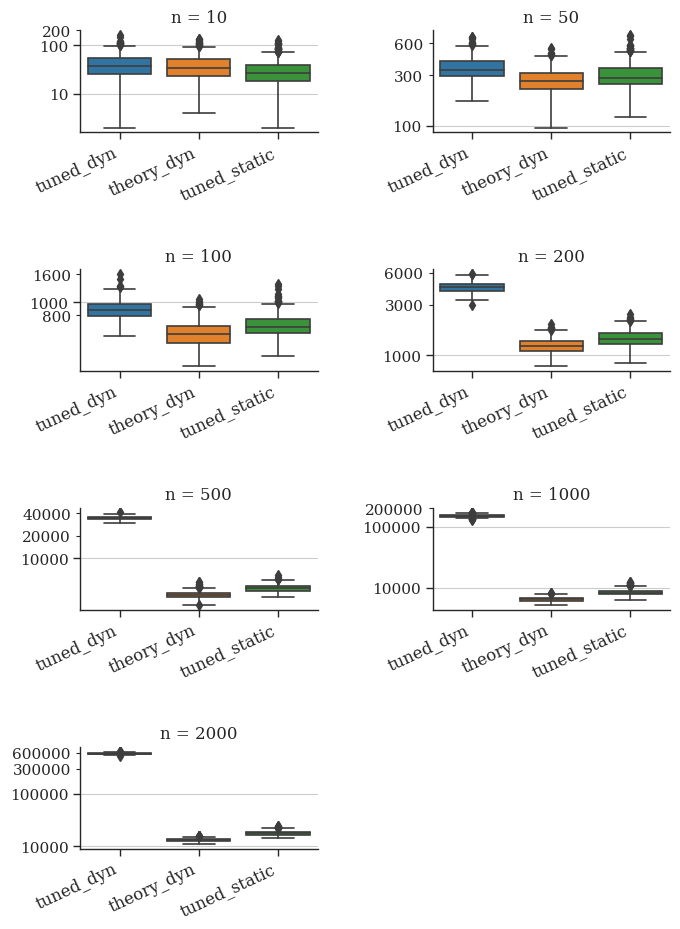

In [79]:
# tuned_dyn vs tuned_static
exps = ["tuned_dyn", "theory_dyn", "tuned_static"]
#plt.figure(figsize=(5,5))
ttemp = t_all[(t_all.experiment.isin(exps)) & (t_all.n<3000)]
# resort exp in tdata
tdata = ttemp[ttemp.experiment==exps[0]]
for exp in exps[1:]:
    tdata = pd.concat([tdata, ttemp[ttemp.experiment==exp]], axis=0)
g = sns.catplot(data=tdata, x="experiment", y="evaluation_results", col="n", sharex=False, sharey=False, kind="box", col_wrap=2, height=2.5, aspect=1.5)
labels = tdata.experiment.unique()
i = 0
for ax in g.axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
    #[s.set_fontsize(8) for s in ax.get_xticklabels()]
    #ax.set_xticklabels(ax.get_xticklabels(), rotation = 30)
    #ax.tick_params(axis='x', labelrotation=30)
    ax.set_xticklabels(labels, rotation=25, ha='right', fontdict={"fontsize":12})
    if i>-1:
        ax.set_yscale("log", base=10)
        ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.get_yaxis().set_minor_formatter(matplotlib.ticker.ScalarFormatter())
        ax.yaxis.set_major_locator(matplotlib.ticker.LogLocator(base=10, numticks=100))
        #ax.yaxis.set_major_locator(plt.MaxNLocator(3))
        #ticks = ax.get_yticks()
        #print(ticks)
        #ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1000))
        ax.yaxis.set_minor_locator(plt.MaxNLocator(2))
        #ax.minorticks_off()
    i += 1
plt.tight_layout()
#plt.subplots_adjust(hspace=0.25, wspace=0.3)
plt.savefig(f"plots/dyn_vs_static.{plotFormat}")

In [7]:
# statistical results
def ttest(t, conf1, conf2):
    val1 = t[t.experiment==conf1].evaluation_results.values.astype("uint64")
    val2 = t[t.experiment==conf2].evaluation_results.values.astype("uint64")
    pval = scipy.stats.ranksums(val1, val2).pvalue
    return pval

for n in t_all.n.unique():
    print(f"n: {n}, theory_dyn vs tuned_dyn: {ttest(t_all[t_all.n==n], 'theory_dyn', 'tuned_dyn')}")
    print(f"n: {n}, tuned_static vs tuned_dyn: {ttest(t_all[t_all.n==n], 'tuned_static', 'tuned_dyn')}")

n: 10, theory_dyn vs tuned_dyn: 0.11374551098344882
n: 10, tuned_static vs tuned_dyn: 6.124069775637206e-15
n: 50, theory_dyn vs tuned_dyn: 3.057360626795193e-46
n: 50, tuned_static vs tuned_dyn: 3.4054914396873813e-20
n: 100, theory_dyn vs tuned_dyn: 5.2704675500847675e-129
n: 100, tuned_static vs tuned_dyn: 6.114289153182679e-90
n: 200, theory_dyn vs tuned_dyn: 5.838694752203346e-165
n: 200, tuned_static vs tuned_dyn: 5.838694752203346e-165
n: 500, theory_dyn vs tuned_dyn: 5.838694752203346e-165
n: 500, tuned_static vs tuned_dyn: 5.838694752203346e-165
n: 1000, theory_dyn vs tuned_dyn: 5.838694752203346e-165
n: 1000, tuned_static vs tuned_dyn: 5.838694752203346e-165
n: 2000, theory_dyn vs tuned_dyn: 5.838694752203346e-165
n: 2000, tuned_static vs tuned_dyn: 5.838694752203346e-165
n: 3000, theory_dyn vs tuned_dyn: 5.838694752203346e-165
n: 3000, tuned_static vs tuned_dyn: 5.838694752203346e-165


/var/folders/1_/f9k09h0s23jck5zsrczlm15c0000gq/T/ipykernel_55408/3130403446.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.experiment = [s.replace("_dyn","") for s in tdata.experiment]
/var/folders/1_/f9k09h0s23jck5zsrczlm15c0000gq/T/ipykernel_55408/3130403446.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tdata.experiment = [s.replace("_start","(S)") for s in tdata.experiment]
/var/folders/1_/f9k09h0s23jck5zsrczlm15c0000gq/T/ipykernel_55408/3130403446.py:17: SettingWithCopyWarning: 
A val

<Figure size 1500x2000 with 0 Axes>

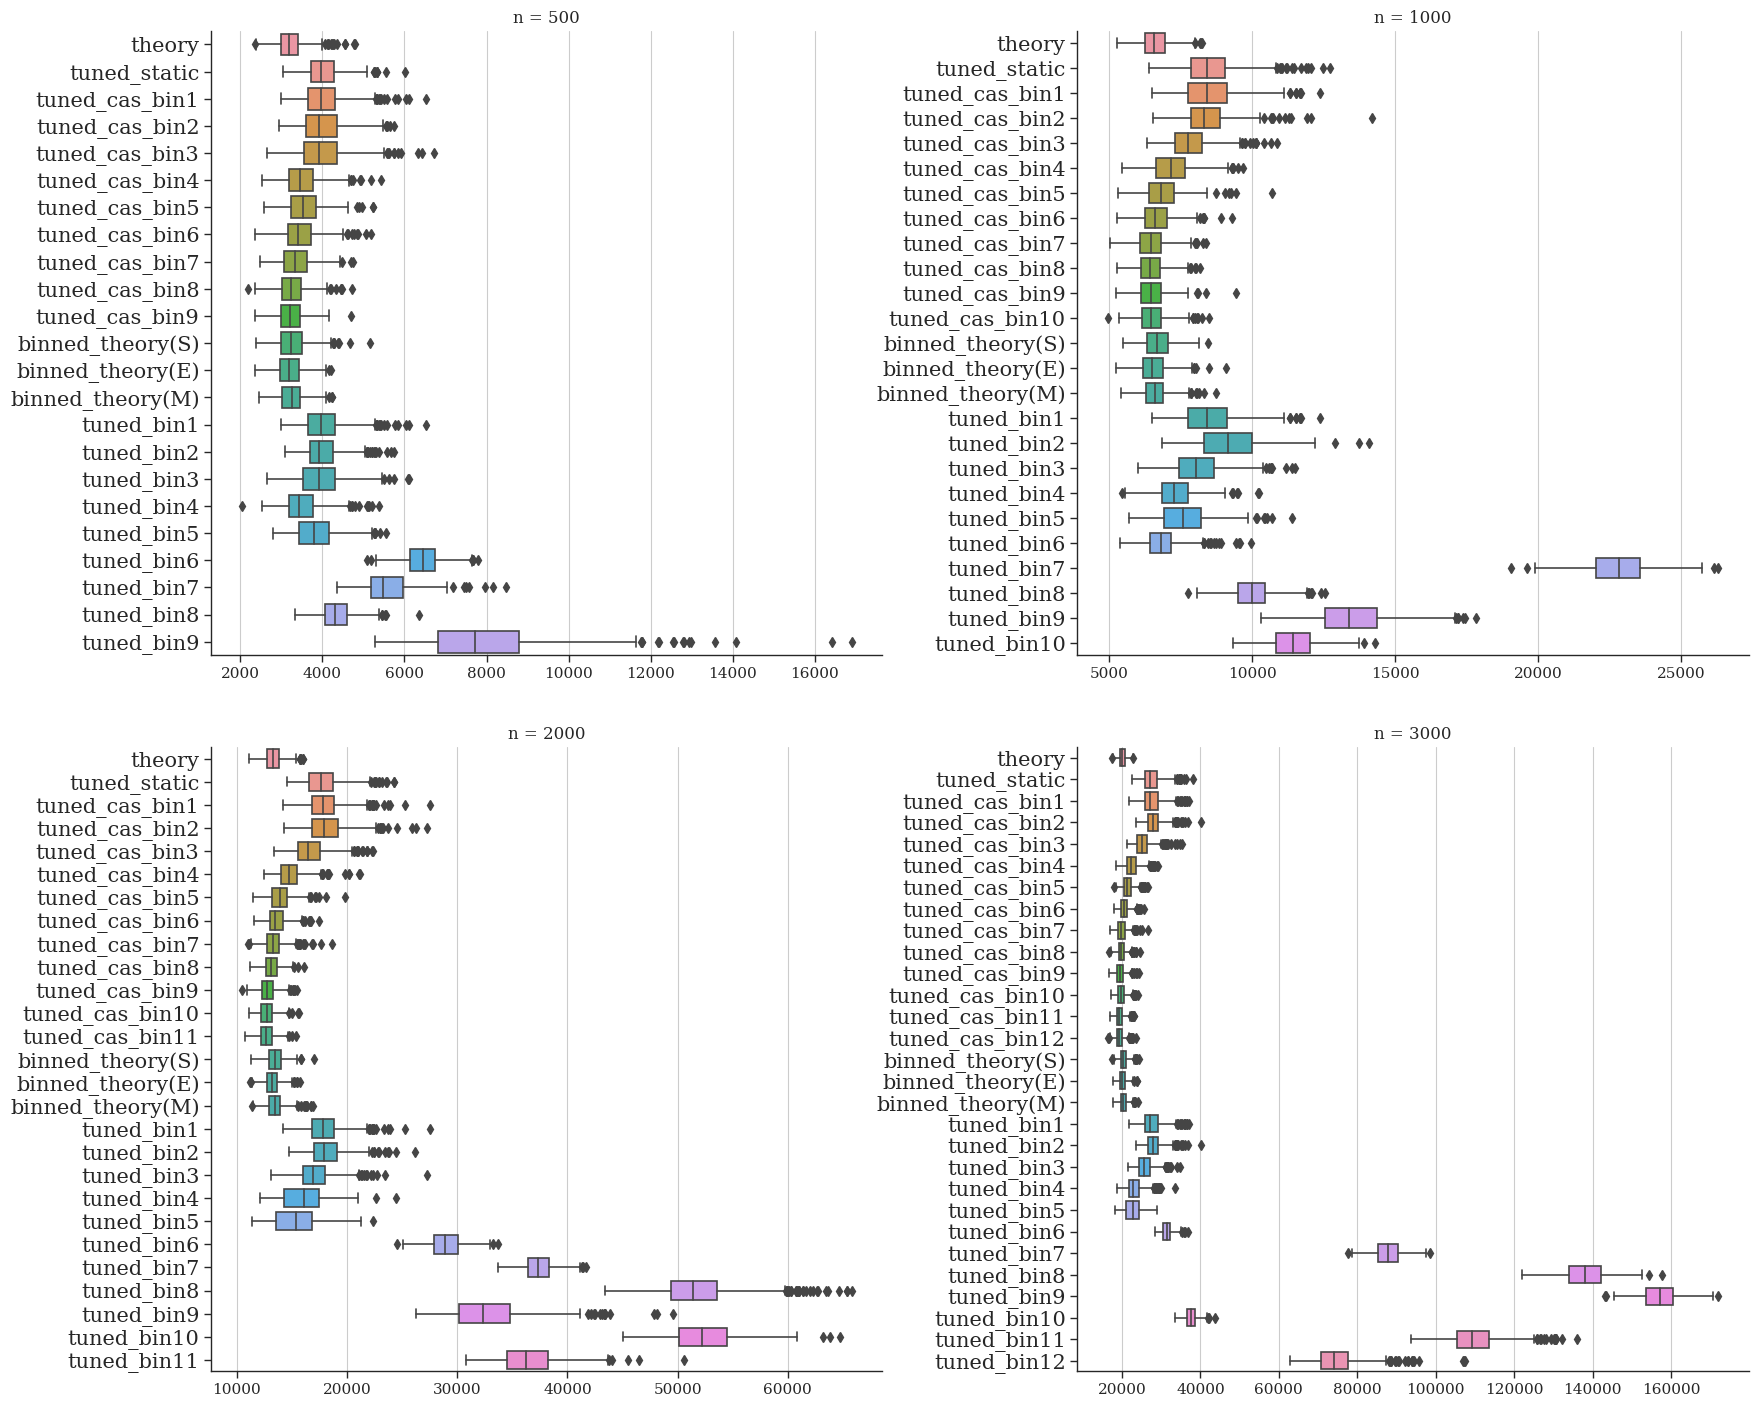

In [8]:
# all tuning experiments
plt.figure(figsize=(15,20))
tdata = t_all[(t_all.n>=500) & (
                    (t_all.experiment=="theory_dyn")
                    | (t_all.experiment=="tuned_static")
                    #| (t_all.experiment=="tuned_dyn")
                    | (t_all.experiment.str.contains("tuned_dyn_bin"))
                    | (t_all.experiment.str.contains("tuned_dyn_cas_bin"))
                    | (t_all.experiment.str.contains("binned_theory_dyn"))
                    #| (t_all.experiment.str.contains("binned_optimal_dyn"))
                    #| (t_all.experiment.str.contains("optimal_dyn_bin"))
                      )
                    & ~t_all.experiment.str.contains("sc")
                    ]
tdata.experiment = [s.replace("_dyn","") for s in tdata.experiment]
tdata.experiment = [s.replace("_start","(S)") for s in tdata.experiment]
tdata.experiment = [s.replace("_end","(E)") for s in tdata.experiment]
tdata.experiment = [s.replace("_middle","(M)") for s in tdata.experiment]
g = sns.catplot(data=tdata,
            y="experiment", x="evaluation_results", col="n", col_wrap=2, 
            sharey=False, kind="box", sharex=False, aspect=1.2, height=7.5)
sizes = tdata.n.unique()
i = 0
for ax in g.axes:
    ax.set_xlabel("")
    ax.set_ylabel("")
    labels = tdata[tdata.n==sizes[i]].experiment.unique()
    i += 1
    ax.set_yticklabels(labels, fontdict={"fontsize":15})
#g.set_xticklabels(rotation=30)
#plt.tight_layout()
plt.savefig(f"plots/all_tuned.{plotFormat}")

In [9]:
trd = pd.read_csv("main_data_reduced_final.csv")
    
# temporary: add missing data from Maxim
opt_500 = {"n":500, "experiment": "optimal_dyn", "empirical_runtime_mean": np.nan, "empirical_runtime_std": np.nan, "computed_runtime_mean": 2916.939393531681}
opt_1000 = {"n":1000, "experiment": "optimal_dyn", "empirical_runtime_mean": np.nan, "empirical_runtime_std": np.nan, "computed_runtime_mean": 5975.807781494335}
opt_2000 = {"n":2000, "experiment": "optimal_dyn", "empirical_runtime_mean": np.nan, "empirical_runtime_std": np.nan, "computed_runtime_mean": 12157.616839225257}
opt_bin_500 = {"n":500, "experiment": "optimal_dyn_bin", "empirical_runtime_mean": np.nan, "empirical_runtime_std": np.nan, "computed_runtime_mean": 2925.52}
opt_bin_1000 = {"n":1000, "experiment": "optimal_dyn_bin", "empirical_runtime_mean": np.nan, "empirical_runtime_std": np.nan, "computed_runtime_mean": 5994.89}
opt_bin_2000 = {"n":2000, "experiment": "optimal_dyn_bin", "empirical_runtime_mean": np.nan, "empirical_runtime_std": np.nan, "computed_runtime_mean": 12197.66}
reduced_data = pd.DataFrame([opt_500, opt_1000, opt_2000, opt_bin_500, opt_bin_1000, opt_bin_2000])
for _, r in reduced_data.iterrows():
    trd.loc[(trd.n==r.n) & (trd.experiment==r.experiment),"computed_runtime_mean"] = r.computed_runtime_mean
trd = trd.sort_values(by=["n","experiment"])

# for all tuned_dyn_cas_bin, get the one with the largest number of bins only
tcompare = trd[((trd.n==500) & (trd.experiment=="tuned_dyn_cas_bin8")) | 
               ((trd.n==1000) & (trd.experiment=="tuned_dyn_cas_bin9")) | 
               ((trd.n==2000) & (trd.experiment=="tuned_dyn_cas_bin10")) | 
               ((trd.n==3000) & (trd.experiment=="tuned_dyn_cas_bin11"))]
tcompare.loc[:, "experiment"] = "tuned_dyn_cas_bin"

# show exact runtime of best tuned_dyn_cas_bin vs theory_dyn vs optimal_dyn for n<3000
tcompare = pd.concat([tcompare, trd[trd.experiment.isin(["theory_dyn","optimal_dyn","optimal_dyn_bin"])]], axis=0)
display(tcompare[tcompare.n<3000].pivot(index="n", columns="experiment", values="computed_runtime_mean").round(2))
display(tcompare[tcompare.n<3000].pivot(index="n", columns="experiment", values="empirical_runtime_mean").round(2))

# show empirical runtime of best tuned_dyn_cas_bin vs theory_dyn for n=3000
display(tcompare[tcompare.n==3000].pivot(index="n", columns="experiment", values="empirical_runtime_mean").round(2))

/var/folders/1_/f9k09h0s23jck5zsrczlm15c0000gq/T/ipykernel_55408/2281404878.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcompare.loc[:, "experiment"] = "tuned_dyn_cas_bin"


experiment,optimal_dyn,optimal_dyn_bin,theory_dyn,tuned_dyn_cas_bin
n,,,,
500,2916.94,2925.52,3224.89,3249.09
1000,5975.81,5994.89,6586.67,6512.32
2000,12157.62,12197.66,13386.44,12703.88


experiment,optimal_dyn,optimal_dyn_bin,theory_dyn,tuned_dyn_cas_bin
n,,,,
500,2935.62,2920.33,3227.90,3234.78
1000,5984.26,5959.82,6605.07,6492.32
2000,12178.19,12185.74,13315.53,12709.99


experiment,theory_dyn,tuned_dyn_cas_bin
n,,
3000,20128.97,19411.0


In [10]:
########### statistical results: theory_dyn/optimal_bin vs tuned_dyn_cas_bin (last number) 
def ttest(t, conf1, conf2):
    val1 = t[t.experiment==conf1].evaluation_results.values.astype("uint64")
    val2 = t[t.experiment.str.contains(conf2)].evaluation_results.values.astype("uint64")
    pval = scipy.stats.ranksums(val1, val2).pvalue
    return pval, np.mean(val1), np.mean(val2)

tstat = t_all[((t_all.n==500) & (t_all.experiment=="tuned_dyn_cas_bin8")) | 
               ((t_all.n==1000) & (t_all.experiment=="tuned_dyn_cas_bin9")) | 
               ((t_all.n==2000) & (t_all.experiment=="tuned_dyn_cas_bin10")) | 
               ((t_all.n==3000) & (t_all.experiment=="tuned_dyn_cas_bin11")) |
               (t_all.experiment.isin(["theory_dyn","optimal_dyn","optimal_dyn_bin"]) & (t_all.n>=500) & (t_all.n<=3000))]
for n in tstat.n.unique():
    pvalue, mean1, mean2 = ttest(tstat[tstat.n==n], 'theory_dyn', 'tuned_dyn_cas_bin')
    print(f"n: {n}, theory_dyn vs tuned_dyn_cas_bin: {pvalue*3:.2}, {mean1}, {mean2} ")
    pvalue, mean1, mean2 = ttest(tstat[tstat.n==n], 'optimal_dyn', 'tuned_dyn_cas_bin')
    print(f"n: {n}, optimal_dyn vs tuned_dyn_cas_bin: {pvalue*3:.2}, {mean1}, {mean2} ")
    pvalue, mean1, mean2 = ttest(tstat[tstat.n==n], 'optimal_dyn_bin', 'tuned_dyn_cas_bin')
    print(f"n: {n}, optimal_dyn_bin vs tuned_dyn_cas_bin: {pvalue*3:.2}, {mean1}, {mean2} ")

n: 500, theory_dyn vs tuned_dyn_cas_bin: 0.31, 3227.896, 3254.794 
n: 500, optimal_dyn vs tuned_dyn_cas_bin: 5.7e-40, 2935.624, 3254.794 
n: 500, optimal_dyn_bin vs tuned_dyn_cas_bin: 1.6e-45, 2920.33, 3254.794 
n: 1000, theory_dyn vs tuned_dyn_cas_bin: 0.0008, 6605.074, 6487.806 
n: 1000, optimal_dyn vs tuned_dyn_cas_bin: 8.5e-48, 5984.264, 6487.806 
n: 1000, optimal_dyn_bin vs tuned_dyn_cas_bin: 4.7e-51, 5959.82, 6487.806 
n: 2000, theory_dyn vs tuned_dyn_cas_bin: 3.8e-27, 13315.528, 12748.334 
n: 2000, optimal_dyn vs tuned_dyn_cas_bin: 3.1e-28, 12178.188, 12748.334 
n: 2000, optimal_dyn_bin vs tuned_dyn_cas_bin: 1.8e-27, 12185.74, 12748.334 
n: 3000, theory_dyn vs tuned_dyn_cas_bin: 8.8e-27, 20128.966, 19417.278 
n: 3000, optimal_dyn vs tuned_dyn_cas_bin: nan, nan, 19417.278 
n: 3000, optimal_dyn_bin vs tuned_dyn_cas_bin: nan, nan, 19417.278 


/Users/nttd/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:8504: RuntimeWarning: invalid value encountered in double_scalars
  z = (s - expected) / np.sqrt(n1*n2*(n1+n2+1)/12.0)
/Users/nttd/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/nttd/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


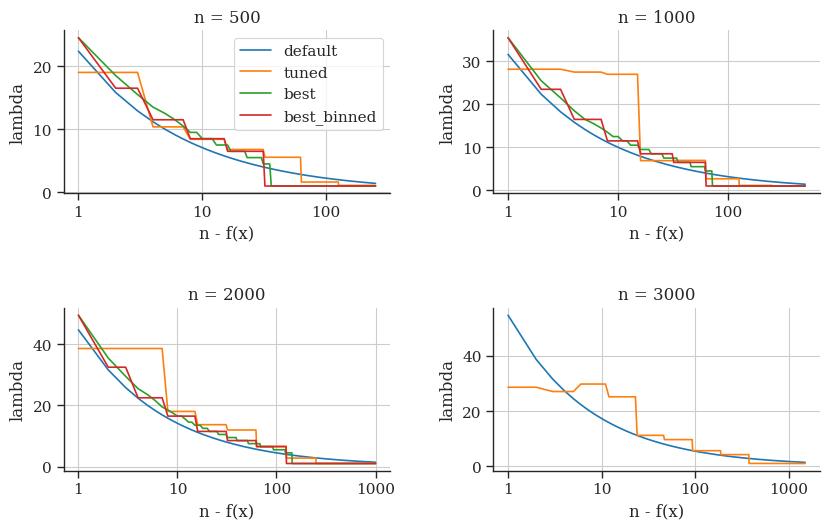

In [19]:
########### plot policies for final comparison #############

tp = t[((t.n==500) & (t.experiment=="tuned_dyn_cas_bin8")) | 
               ((t.n==1000) & (t.experiment=="tuned_dyn_cas_bin9")) | 
               ((t.n==2000) & (t.experiment=="tuned_dyn_cas_bin10")) | 
               ((t.n==3000) & (t.experiment=="tuned_dyn_cas_bin11")) |
               t.experiment.isin(["optimal_dyn","optimal_dyn_bin", "theory_dyn"])
      ]
tp = tp[tp.n>=500][["n","experiment","best_configuration"]]
tp.loc[tp.experiment.str.contains("tuned_dyn_cas_bin"), "experiment"] = "tuned_dyn_cas_bin"
tp.loc[:,"fx"] = [v["fx"] for v in tp.best_configuration.values]
tp.loc[:,"lbd"] = [v["lbd"] for v in tp.best_configuration.values]

# unroll each policy to an array of n elements, for plotting purpose
def convert_to_list(fx, lbd, n):
    ls = []
    fx = fx + [n]
    start = fx[0]
    i = 0
    for end in fx[1:]:
        ls += [lbd[i]] * (end-start)
        start = end
        i += 1
    return ls

tp["fx_unrolled"] = [list(range(n)) for n in tp.n]
tp["lbd_unrolled"] = np.nan
tp["lbd_unrolled"] = tp["lbd_unrolled"].astype(object)
for i, r in tp.iterrows():
    tp.at[i,"lbd_unrolled"] = convert_to_list(r.fx, r.lbd, r.n)

tp_new = None
for _, r in tp.iterrows():
    tsub = pd.DataFrame({"fx":r.fx_unrolled, "lbd":r.lbd_unrolled})
    tsub["n"] = r["n"]
    tsub["experiment"] = r["experiment"]
    if tp_new is None:
        tp_new = tsub
    else:
        tp_new = pd.concat([tp_new,tsub],axis=0)
        
new_names = {"optimal_dyn": "best", "optimal_dyn_bin": "best_binned", "theory_dyn": "default", "tuned_dyn_cas_bin": "tuned"}
for name in new_names.keys():
    tp_new.loc[tp_new.experiment==name, "experiment"] = new_names[name]
tp_new.to_csv("policies.csv", index=False)
        
# we only plot with f(x)>=n/2
tp_new["start_fx"] = tp_new.n/2
tp_new = tp_new[tp_new.fx>=tp_new.start_fx]

# for plotting in log scale, we use n-f(x) instead
log_scale = True
if log_scale:
    tp_new["fx"] = tp_new["n"] - tp_new["fx"]
    

g = sns.relplot(data=tp_new, x="fx", y="lbd", col="n", hue="experiment", kind="line", facet_kws={'sharey': False, 'sharex': False, 'legend_out':False}, height=3, col_wrap=2, aspect=1.5)
i = 0
for ax in g.axes:
    #if i>1:
    #    ax.set_xlabel("n - f(x)")
    #else:
    #    ax.set_xlabel("")
    ax.set_xlabel("n - f(x)")
    ax.set_ylabel("lambda")
    ax.set_xscale("log")
    ax.xaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax.set_xticklabels(ax.get_xticklabels())
    #ax.set_xticks([1,10,50,100])
    start, end = ax.get_xlim()
    ax.set_xticks([], minor=True)
    #ax.set_xticks(ax.get_xticks())
    i += 1
g._legend.set_title("")
#for r, l in zip(g._legend.texts, ["theory","tuned","best","best_binned"]):
#    r.set_text(l)
plt.tight_layout()
#plt.subplots_adjust(hspace=0.3)
plt.savefig(f"plots/policies.{plotFormat}")

In [12]:
# sc6 for n=500 and sc7 for n=1000 (for confirming unstability issue)

n, exp1, exp2, exp3, exp4 = 500, "tuned_dyn_bin6", "tuned_dyn_bin7", "tuned_dyn_bin_sc6", "tuned_dyn_bin_sc7"
mean1 = np.mean(t[(t.n==n) & (t.experiment==exp1)].evaluation_results.values[0])
mean2 = np.mean(t[(t.n==n) & (t.experiment==exp2)].evaluation_results.values[0])
mean3 = np.mean([np.mean(ls) for ls in t[(t.n==n) & (t.experiment==exp3)].evaluation_results.values])
mean4 = np.mean([np.mean(ls) for ls in t[(t.n==n) & (t.experiment==exp4)].evaluation_results.values])
print(f"{mean1}, {mean2}, {mean3}, {mean4}")

n, exp1, exp2, exp3 = 1000, "tuned_dyn_bin7", "tuned_dyn_bin8", "tuned_dyn_bin_sc7"
mean1 = np.mean(t[(t.n==n) & (t.experiment==exp1)].evaluation_results.values[0])
mean2 = np.mean(t[(t.n==n) & (t.experiment==exp2)].evaluation_results.values[0])
mean3 = np.mean([np.mean(ls) for ls in t[(t.n==n) & (t.experiment==exp3)].evaluation_results.values])
print(f"{mean1}, {mean2}, {mean3}")

6446.9, 5588.926, 4921.3832, 6043.5804
22794.446, 10004.932, 10352.822400000001


In [13]:
t_all.experiment.unique()
display(t_all[(t_all.experiment.isin(["tuned_dyn_bin_sc9","tuned_dyn_bin_sc10"])) 
              | ((t_all.n==500) & (t_all.experiment=="tuned_dyn_bin9"))
              | ((t_all.n==500) & (t_all.experiment=="tuned_dyn_cas_bin9"))
              | ((t_all.n==1000) & (t_all.experiment=="tuned_dyn_bin10"))
              | ((t_all.n==1000) & (t_all.experiment=="tuned_dyn_cas_bin10"))
             ].groupby(["n","experiment"]).evaluation_results.mean())
display(t[t.experiment.isin(["tuned_dyn_bin_sc9","tuned_dyn_bin_sc10"])])

n     experiment         
500   tuned_dyn_bin9          7988.216
      tuned_dyn_bin_sc9       5818.312
      tuned_dyn_cas_bin9      3234.780
1000  tuned_dyn_bin10        11468.866
      tuned_dyn_bin_sc10     15109.752
      tuned_dyn_cas_bin10     6492.320
Name: evaluation_results, dtype: float64

,n,experiment,max_evals,tuning_budget,tuning_time,evaluation_results,best_configuration,sum_of_time
370,500,tuned_dyn_bin_sc9,99999999,50000,NaN,"[4955, 5748, 5099, 6000, 4481, 5746, 6538, 606...","{'fx': [0, 250, 375, 438, 469, 485, 493, 497, ...",0.000000e+00
371,1000,tuned_dyn_bin_sc10,99999999,100000,NaN,"[14614, 16254, 15202, 17161, 17602, 13219, 189...","{'fx': [0, 500, 750, 875, 938, 969, 985, 993, ...",1.733002e+09
